Slope (b1): 4.58789860997547, Intercept (b0): 12.584627964022893


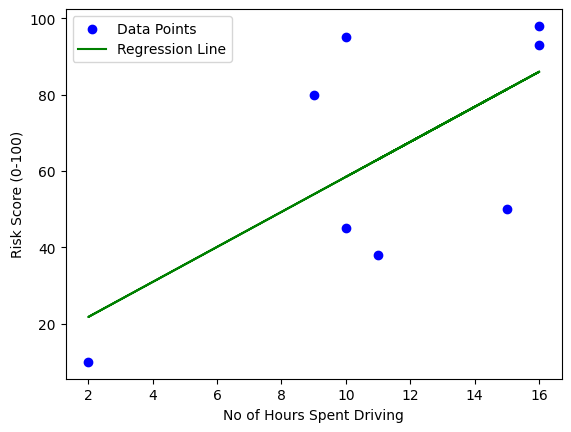

RMSE: 22.759716640449565, R² Score: 43.71%
Enter hours spent driving: 6
Predicted Risk Score: 40.11


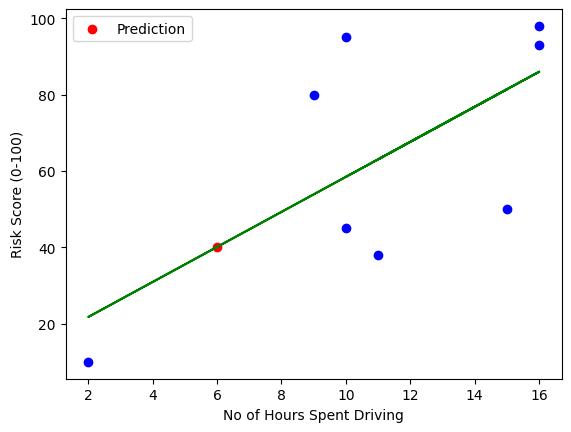

In [ ]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs
import pandas as pd  # Importing Pandas for handling datasets

# Load dataset from a CSV file
data = pd.read_csv('/content/SLR-Data.csv')  # Reads the dataset
X = data['No of Hours Spent During(X)'].values  # Extracting the independent variable (Hours Spent)
Y = data['Risk Score on a scale of 0-100(Y)'].values  # Extracting the dependent variable (Risk Score)

# Calculate the coefficients for Simple Linear Regression
mean_x, mean_y = np.mean(X), np.mean(Y)  # Calculate the mean of X and Y
b1 = np.sum((X - mean_x) * (Y - mean_y)) / np.sum((X - mean_x) ** 2)  # Calculate the slope (b1)
b0 = mean_y - b1 * mean_x  # Calculate the intercept (b0)

print(f"Slope (b1): {b1}, Intercept (b0): {b0}")  # Print the slope and intercept

# Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data Points')  # Scatter plot of data points
plt.plot(X, b0 + b1 * X, color='green', label='Regression Line')  # Regression line
plt.xlabel('No of Hours Spent Driving')  # X-axis label
plt.ylabel('Risk Score (0-100)')  # Y-axis label
plt.legend()  # Add legend to the plot
plt.show()  # Display the plot

# Calculate RMSE (Root Mean Squared Error) and R² score
y_pred = b0 + b1 * X  # Predicted values using the regression equation
rmse = np.sqrt(np.mean((Y - y_pred) ** 2))  # Calculate RMSE
r2 = 1 - (np.sum((Y - y_pred) ** 2) / np.sum((Y - mean_y) ** 2))  # Calculate R² score

print(f"RMSE: {rmse}, R² Score: {r2 * 100:.2f}%")  # Print RMSE and R² score

# Predict a new value based on user input
predict_x = float(input("Enter hours spent driving: "))  # Take input for hours spent
predict_y = b0 + b1 * predict_x  # Calculate predicted risk score
print(f"Predicted Risk Score: {predict_y:.2f}")  # Print the predicted risk score

# Plot prediction along with the regression line
plt.scatter(X, Y, color='blue')  # Scatter plot of data points
plt.plot(X, b0 + b1 * X, color='green')  # Regression line
plt.scatter(predict_x, predict_y, color='red', label='Prediction')  # Mark the predicted point
plt.xlabel('No of Hours Spent Driving')  # X-axis label
plt.ylabel('Risk Score (0-100)')  # Y-axis label
plt.legend()  # Add legend
plt.show()  # Display the plot



In [ ]:
#  SECOND PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

# Standardize the features
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = StandardScaler().fit_transform(df[features])

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Combine PCA results with target column
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

# Plot the PCA results
plt.figure(figsize=(8, 8))
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = finalDf['target'] == target
    plt.scatter(finalDf.loc[indices, 'PC1'], finalDf.loc[indices, 'PC2'], c=color, s=50, label=target)

plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('2D PCA of Iris Dataset', fontsize=20)
plt.legend(targets)
plt.grid()
plt.show()


In [ ]:
#THIRD    DECISION TREE


downloaded = drive.CreateFile({'id':'1jql2mwV15BCFeX52G1PGSCr8Y4jLdn8f'}) # replace the id with id of file you want to access
downloaded.GetContentFile('DT-Data.csv')



NameError: name 'drive' is not defined

In [ ]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization (if needed later)
import pandas as pd  # For handling datasets

# Reading the dataset
dataset = pd.read_csv("DT-Data.csv")  # Load the dataset from a CSV file
X = dataset.iloc[:, :-1]  # Select all columns except the last one as independent variables
y = dataset.iloc[:, 5].values  # Select the last column as the dependent variable (target)

# Perform Label Encoding to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for encoding categorical data
labelencoder_X = LabelEncoder()  # Create an instance of LabelEncoder

X = X.apply(LabelEncoder().fit_transform)  # Apply LabelEncoder to each column of X
# The `fit_transform` function encodes categorical data into numerical format
print(X)  # Print the transformed X values to verify encoding

# Import and initialize the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
regressor = DecisionTreeClassifier()  # Create an instance of the Decision Tree model

# Fit the Decision Tree model to the dataset
regressor.fit(X.iloc[:, 1:5], y)  # Train the model using columns 1 to 4 (features) and y (target)

# Predict a value for a new input
X_in = np.array([0, 1, 0, 1])  # Define a new data point to predict (based on encoded features)
y_pred = regressor.predict([X_in])  # Use the trained model to make a prediction
print("Prediction:", y_pred)  # Print the prediction result

# Import libraries for visualizing the Decision Tree
from six import StringIO  # StringIO allows creation of in-memory file-like objects
from IPython.display import Image  # To display the decision tree as an image
from sklearn.tree import export_graphviz  # To export the decision tree as DOT format
import pydotplus  # To convert DOT data into graph and image format

# Create DOT data for visualizing the Decision Tree
dot_data = StringIO()  # Create a StringIO object to hold the DOT data
export_graphviz(
    regressor,
    out_file=dot_data,  # Export the decision tree structure to the StringIO object
    filled=True,  # Color the nodes based on class labels
    rounded=True,  # Use rounded nodes for better visualization
    special_characters=True  # Include special characters in feature names if needed
)

# Draw the Decision Tree graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  # Create a graph object from the DOT data
graph.write_png('Decision_Tree.png')  # Write the graph to a PNG file for saving

# Display the Decision Tree graph
Image(graph.create_png())  # Render and display the decision tree as an image


In [ ]:
# FOURTH NAIVE BAYES

In [8]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization (not used here but can be useful)
import pandas as pd  # For handling datasets
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.naive_bayes import GaussianNB  # For implementing Naive Bayes classifier
from sklearn.metrics import confusion_matrix  # To evaluate model performance

# Load the dataset
dataset = pd.read_csv("/content/iris (1).csv")  # Read the CSV file containing the dataset
print(dataset)  # Display the dataset

# Splitting the dataset into independent (X) and dependent (y) variables
X = dataset.iloc[:, :4].values  # Select the first 4 columns as features (sepal length, sepal width, etc.)
y = dataset['variety'].values  # Select the 'variety' column as the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=82
)
# test_size=0.20 indicates 20% of data is used for testing, and the rest for training
# random_state=82 ensures reproducibility of the data split

# Feature Scaling to standardize the dataset
sc = StandardScaler()  # Create an object of StandardScaler
X_train = sc.fit_transform(X_train)  # Fit and transform the training data to scale it
X_test = sc.transform(X_test)  # Transform the test data using the same scaling as training data

# Fitting Naive Bayes classifier to the Training set
nb = GaussianNB()  # Create an instance of the Gaussian Naive Bayes classifier
nb.fit(X_train, y_train)  # Train the classifier on the scaled training data

# Predicting the test set results
y_pred = nb.predict(X_test)  # Predict the target variable for the test data

# Creating a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)  # Evaluate model performance by comparing actual vs predicted values
print("Confusion Matrix:\n", cm)

# Finding accuracy from the confusion matrix
a = cm.shape  # Get the dimensions of the confusion matrix
corrPred = 0  # Initialize a counter for correct predictions
falsePred = 0  # Initialize a counter for false predictions

# Loop through the confusion matrix to count correct and false predictions
for row in range(a[0]):  # Iterate over the rows
    for c in range(a[1]):  # Iterate over the columns
        if row == c:  # If row index equals column index, it's a correct prediction
            corrPred += cm[row, c]
        else:  # Otherwise, it's a false prediction
            falsePred += cm[row, c]

# Display the results
print("Correct predictions: ", corrPred)
print("False predictions: ", falsePred)

# Calculate and print the accuracy
accuracy = corrPred / cm.sum()  # Accuracy is the ratio of correct predictions to total predictions
print("\nAccuracy of the Naive Bayes Classification is: {:.2f}%".format(accuracy * 100))


     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]
Confusion Matrix:
 [[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]
Correct predictions:  28
False predictions:  2

Accuracy of the Naive Bayes Classification i

In [9]:
#FIFTH SVM


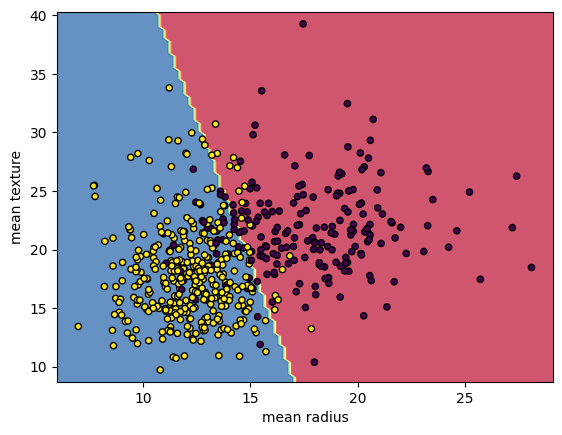

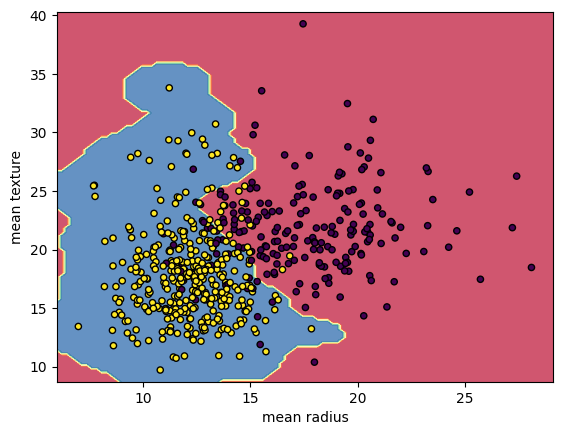

In [14]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer  # For loading the breast cancer dataset
import matplotlib.pyplot as plt  # For data visualization
from sklearn.inspection import DecisionBoundaryDisplay  # To visualize decision boundaries
from sklearn.svm import SVC  # Support Vector Classifier

# Load the breast cancer dataset
cancer = load_breast_cancer()  # Load a built-in dataset about breast cancer diagnosis
X = cancer.data[:, :2]  # Select the first two features for simplicity in visualization
y = cancer.target  # Load the target labels (0 = malignant, 1 = benign)

# Build the first SVM model with a linear kernel
svm = SVC(kernel="linear")  # Create an SVM model with a linear kernel

# Train the model on the dataset
svm.fit(X, y)  # Fit the SVM model to the selected features and labels

# Plot the decision boundary for the linear kernel SVM
DecisionBoundaryDisplay.from_estimator(
    svm,  # The trained SVM model
    X,  # The feature data used for training
    response_method="predict",  # Use the model's predictions to create the boundary
    cmap=plt.cm.Spectral,  # Use the Spectral colormap for visualization
    alpha=0.8,  # Set transparency level for the boundary plot
    xlabel=cancer.feature_names[0],  # Label for the x-axis (first feature name)
    ylabel=cancer.feature_names[1],  # Label for the y-axis (second feature name)
)

# Scatter plot of the data points
plt.scatter(
    X[:, 0],  # First feature values on the x-axis
    X[:, 1],  # Second feature values on the y-axis
    c=y,  # Color the points based on their target label (0 or 1)
    s=20,  # Size of the points
    edgecolors="k",  # Black edge color for the points
)

# Show the plot
plt.show()  # Display the decision boundary and scatter plot

# Build the second SVM model with a radial basis function (RBF) kernel
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# `kernel="rbf"` specifies the RBF kernel
# `gamma=0.5` defines the kernel coefficient for RBF
# `C=1.0` sets the regularization parameter controlling the trade-off between margin size and misclassification

# Train the RBF kernel SVM model on the same dataset
svm.fit(X, y)  # Fit the model to the training data

# Plot the decision boundary for the RBF kernel SVM
DecisionBoundaryDisplay.from_estimator(
    svm,  # The trained SVM model
    X,  # The feature data used for training
    response_method="predict",  # Use the model's predictions to create the boundary
    cmap=plt.cm.Spectral,  # Use the Spectral colormap for visualization
    alpha=0.8,  # Set transparency level for the boundary plot
    xlabel=cancer.feature_names[0],  # Label for the x-axis (first feature name)
    ylabel=cancer.feature_names[1],  # Label for the y-axis (second feature name)
)

# Scatter plot of the data points
plt.scatter(
    X[:, 0],  # First feature values on the x-axis
    X[:, 1],  # Second feature values on the y-axis
    c=y,  # Color the points based on their target label (0 or 1)
    s=20,  # Size of the points
    edgecolors="k",  # Black edge color for the points
)

# Show the plot
plt.show()  # Display the decision boundary and scatter plot


In [15]:
#SIXTH K MEANS


[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.2  0.3 ]
 [0.25 0.5 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]


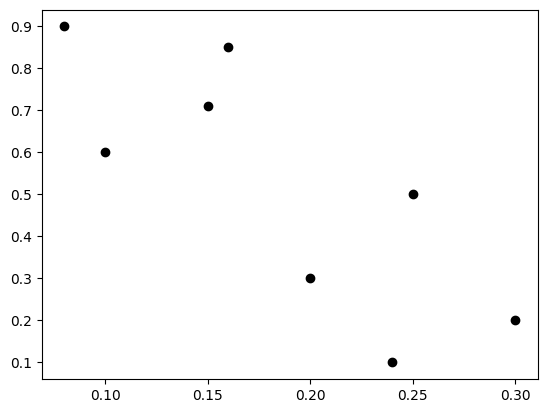

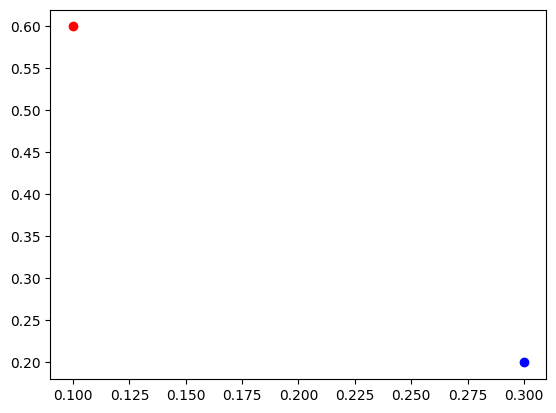

[[0.1 0.3]
 [0.6 0.2]]
point No.6[0.25,0.5] is belongs to blue cluster(cluster no:2)


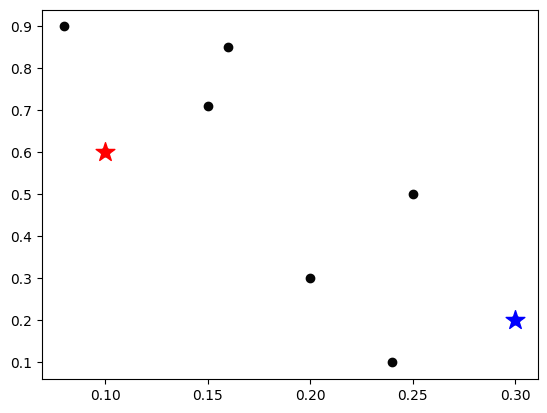

[1 1 1 1 0 0 0 0]
No of population around cluster 2: 3
Previous value of m1 and m2 is:
M1== [0.1 0.3]
M1== [0.6 0.2]
Updated value of m1 and m2 is:
M1== [0.2475 0.275 ]
M1== [0.1225 0.765 ]


In [17]:
# Import necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import pandas as pd  # For creating and handling the dataset

# Create a dataset using a pandas DataFrame
df = pd.DataFrame({
    'X': [0.1, 0.15, 0.08, 0.16, 0.2, 0.25, 0.24, 0.3],  # Feature 1 values
    'y': [0.6, 0.71, 0.9, 0.85, 0.3, 0.5, 0.1, 0.2]  # Feature 2 values
})
# Extract the values of features into arrays
f1 = df['X'].values  # Extract values of column 'X'
f2 = df['y'].values  # Extract values of column 'y'
X = np.array(list(zip(f1, f2)))  # Combine feature values into a single array
print(X)  # Print the combined feature array

# Initialize the centroid points
C_x = np.array([0.1, 0.3])  # Initial x-coordinates of centroids
C_y = np.array([0.6, 0.2])  # Initial y-coordinates of centroids
centroids = C_x, C_y  # Combine x and y coordinates for centroids

# Plot the data points
colmap = {1: 'r', 2: 'b'}  # Define colors for the clusters (red and blue)
plt.scatter(f1, f2, color='k')  # Plot the data points in black
plt.show()  # Display the plot

# Plot the initial centroids
plt.scatter(C_x[0], C_y[0], color=colmap[1])  # Plot the first centroid in red
plt.scatter(C_x[1], C_y[1], color=colmap[2])  # Plot the second centroid in blue
plt.show()  # Display the plot

# Combine centroid coordinates into a single array
C = np.array(list((C_x, C_y)), dtype=np.float32)  # Create a 2D array for centroids
print(C)  # Print the initial centroids

# Plot the data points with the centroids
plt.scatter(f1, f2, c='#050505')  # Plot data points in a dark gray color
print("point No.6[0.25,0.5] is belongs to blue cluster(cluster no:2)")
plt.scatter(C_x[0], C_y[0], marker='*', s=200, c='r')  # Highlight the first centroid in red
plt.scatter(C_x[1], C_y[1], marker='*', s=200, c='b')  # Highlight the second centroid in blue
plt.show()  # Display the plot

# Import the KMeans class from sklearn and create a KMeans model object
from sklearn.cluster import KMeans  # KMeans algorithm for clustering
model = KMeans(n_clusters=2, random_state=0)
# `n_clusters=2` specifies the number of clusters
# `random_state=0` ensures reproducibility of the results

# Fit the KMeans model to the data points
model.fit(X)  # Train the model using the feature array `X`

# Get the cluster labels assigned to each data point
labels = model.labels_  # Each point is labeled as belonging to a cluster
print(labels)  # Print the cluster labels

# Count the number of points in the second cluster
count = 0  # Initialize a counter
for i in range(len(labels)):  # Iterate through the cluster labels
    if labels[i] == 1:  # If the point belongs to cluster 2 (label 1)
        count = count + 1  # Increment the counter

# Print the population around the second cluster centroid
print('No of population around cluster 2:', count - 1)  # Subtracting 1 to exclude the centroid itself

# Find the updated centroids after clustering
new_centroids = model.cluster_centers_  # Access the new centroids from the model

# Print the previous and updated centroids
print('Previous value of m1 and m2 is:')
print('M1==', centroids[0])  # Print the initial first centroid
print('M1==', centroids[1])  # Print the initial second centroid

print('Updated value of m1 and m2 is:')
print('M1==', new_centroids[0])  # Print the updated first centroid
print('M1==', new_centroids[1])  # Print the updated second centroid



In [1]:
######Gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('/content/income_evaluation (1).csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape
df.info()
df.isnull().sum()
df.columns

X = df.drop(columns=' income')
y = df[' income']

from sklearn.preprocessing import LabelEncoder

def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])


df.columns

label_list = [' workclass', ' education',' marital-status',
       ' occupation', ' relationship', ' race', ' sex',' native-country', ' income']

for i in label_list:
    label_encoder(i)

df.head()

from sklearn.model_selection import train_test_split

X = df.drop([' income'],axis=1).values   # independant features
y = df[' income'].values					# dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
print("X_train shape:",X_train.shape)
print("y_test shape:",y_test.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)


#Buildimg Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))


result_dict_train = {}
result_dict_test = {}
result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracies)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test,y_test)


grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))


result_dict_train
result_dict_test

X_train shape: (26048, 14)
y_test shape: (6513,)
X_test shape: (6513, 14)
y_train shape: (26048,)
Train Score: 0.8647881398244366
Test Score: 0.8708736373407032
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Train Score: 0.8712377149877151
Test Score: 0.8776293566712728


{'Gradient-Boost Default Test Score': 0.8708736373407032}